<a href="https://colab.research.google.com/github/kimdaun713/contractTest/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

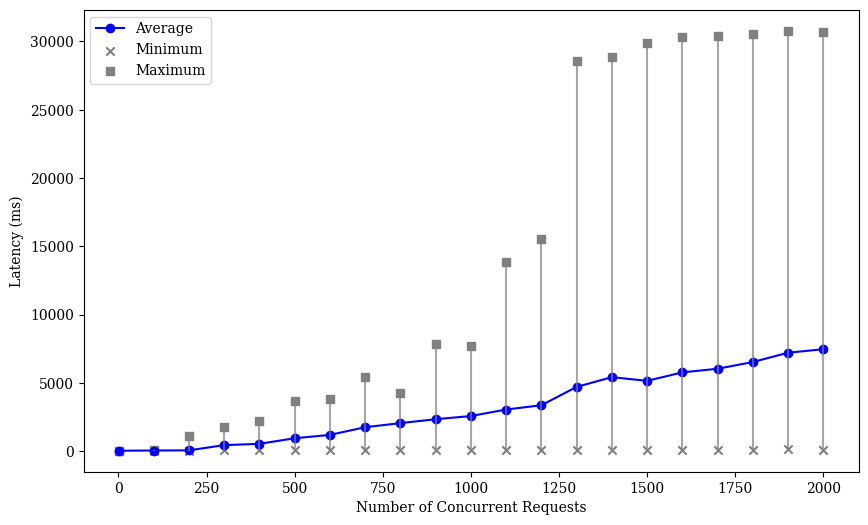

In [ ]:
# Plot the graph with vertical lines showing the range between minimum and maximum values at each sample point
# and with markers for the min and max values
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'serif'
# Plotting the average latency
plt.plot(df_new["표본수"], df_new["평균"], marker='o', color='blue', label='Average')

# Adding markers for the min and max values
plt.scatter(df_new["표본수"], df_new["최소값"], marker='x',color='grey', label='Minimum')
plt.scatter(df_new["표본수"], df_new["최대값"], marker='s', color='grey',label='Maximum')

# Drawing vertical lines for the min-max range at each sample point
for i in df_new.index:
    plt.vlines(df_new["표본수"][i], df_new["최소값"][i], df_new["최대값"][i], color='grey', alpha=0.7)

# Title and labels
plt.xlabel('Number of Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.legend()


# Show the plot
plt.show()

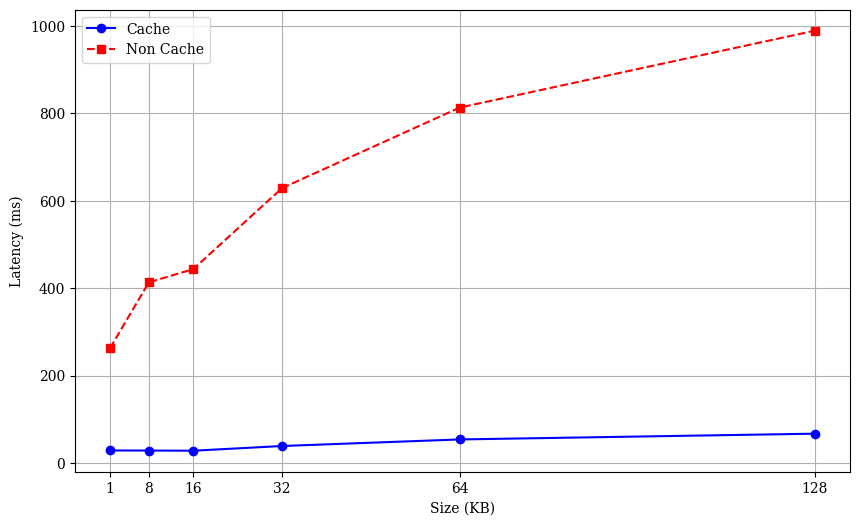

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for cache and cloud
sizes_kb = np.array([1, 8, 16, 32, 64, 128])
cache_times = np.array([
    [42, 39, 10, 11, 41],
    [38, 40, 13, 11, 40],
    [46, 16, 16, 45, 17],
    [51, 25, 48, 20, 50],
    [38, 62, 70, 69, 30],
    [88, 86, 51, 43, 67]
])
cloud_times = np.array([
    [239, 277, 267, 262, 268],
    [276, 524, 494, 279, 494], # Adjusted for missing value with 0 for correct shape
    [557, 270, 557, 533, 301],
    [737, 492, 728, 702, 486],
    [701, 993, 982, 711, 679],
    [870, 1155, 1126, 895, 900]
])

# Adjusting missing values for correct mean calculation
cloud_times[1] = np.where(cloud_times[1] == 0, np.nan, cloud_times[1])

# Calculate means
cache_means = np.mean(cache_times, axis=1)
cloud_means = np.nanmean(cloud_times, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sizes_kb, cache_means, marker='o', linestyle='-', color='b', label='Cache')
plt.plot(sizes_kb, cloud_means, marker='s', linestyle='--', color='r', label='Non Cache')
plt.xlabel('Size (KB)')
plt.ylabel('Latency (ms)')
plt.xticks(sizes_kb)
plt.legend()
plt.grid(True)

plt.show()

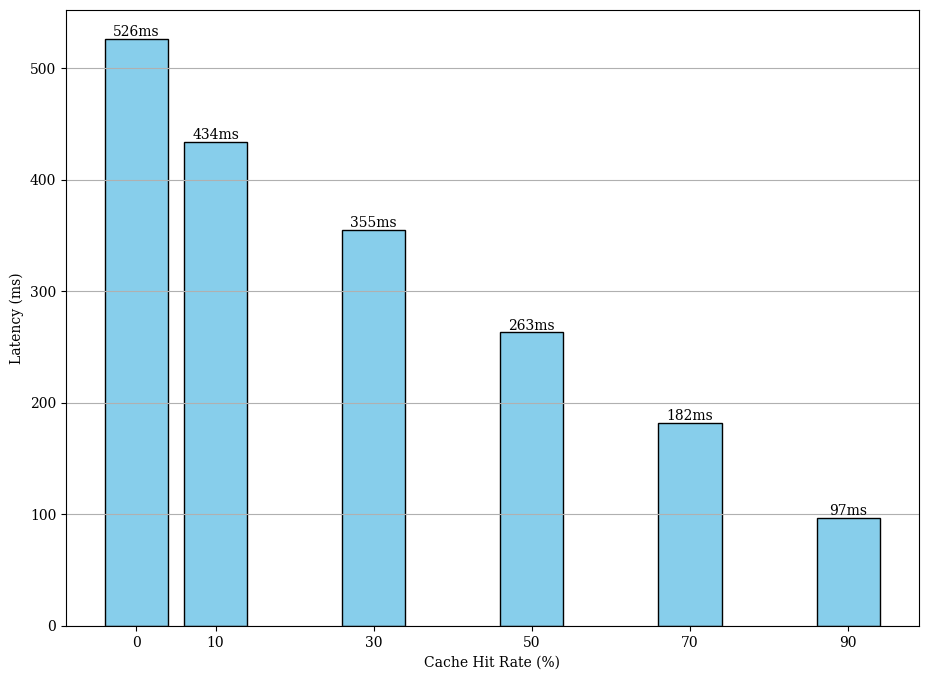

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
# Cache hit rates and corresponding latencies
cache_hit_rates = [0, 10, 30, 50, 70, 90]  # Cache hit rates in percent
latencies = [0.526, 0.434, 0.355, 0.263, 0.182, 0.097]  # Latencies in seconds

# Latencies in milliseconds
latencies_ms = [latency * 1000 for latency in latencies]

# Adjusting bar width and adding edge color
plt.figure(figsize=(11, 8))
bar = plt.bar(cache_hit_rates, latencies_ms, color='skyblue', width=8, edgecolor='black')
plt.xlabel('Cache Hit Rate (%)')
plt.ylabel('Latency (ms)')
plt.xticks(cache_hit_rates)

# Adding data labels
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}ms', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


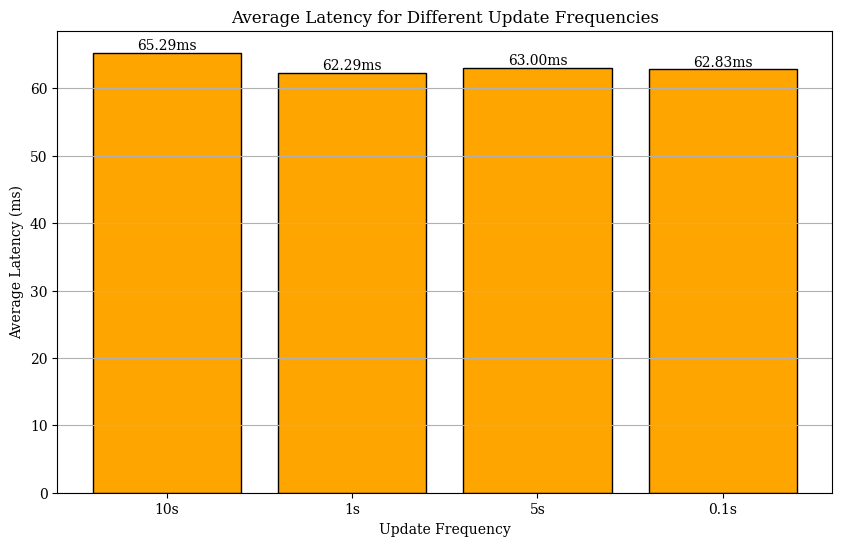

In [ ]:
import matplotlib.pyplot as plt

# Update frequencies and their corresponding average latencies
update_frequencies = ['10s', '1s', '5s', '0.1s']
average_latencies = [
    65.29,  # For updates every 10 seconds
    62.29,  # For updates every 1 second
    63.00,  # For updates every 5 seconds
    62.83   # For updates every 0.1 seconds
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(update_frequencies, average_latencies, color='orange', edgecolor='black')
plt.xlabel('Update Frequency')
plt.ylabel('Average Latency (ms)')
plt.title('Average Latency for Different Update Frequencies')
plt.grid(axis='y')

# Adding data labels
for i, avg_latency in enumerate(average_latencies):
    plt.text(i, avg_latency + 0.5, f'{avg_latency:.2f}ms', ha='center')

plt.show()


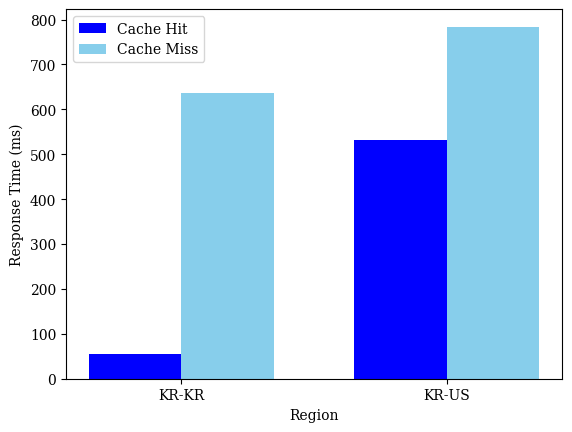

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
# 데이터
regions = ['KR-KR', 'KR-US']
cache_hit = [56, 532]  # milliseconds
cache_miss = [636, 784]  # milliseconds

# 그래프 설정
bar_width = 0.35
index = np.arange(len(regions))

# Cache Hit 막대 그래프
plt.bar(index, cache_hit, bar_width, label='Cache Hit', color='blue')

# Cache Miss 막대 그래프
plt.bar(index + bar_width, cache_miss, bar_width, label='Cache Miss', color='skyblue')

# X 축 레이블과 제목
plt.xlabel('Region')
plt.ylabel('Response Time (ms)')
plt.xticks(index + bar_width / 2, regions)
plt.legend()

# 그래프 표시
plt.show()


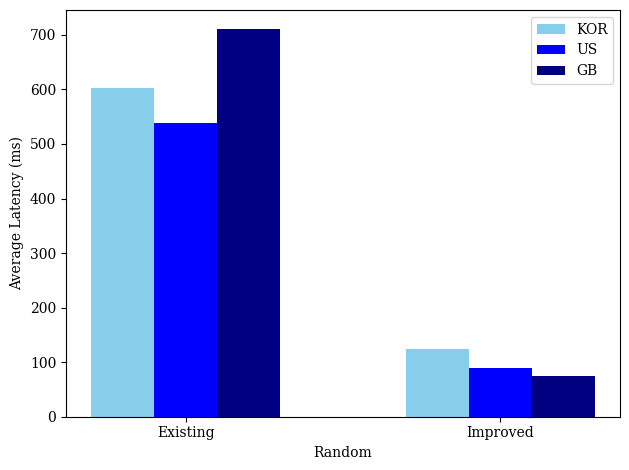

In [ ]:
import matplotlib.pyplot as plt

# 데이터 (케이스 1-1 및 케이스 1-2에 대한 응답 시간을 밀리초로 변환)
response_times_KOR_ms = [time * 1000 for time in [0.6027050186157227, 0.12417147541046143]]
response_times_US_ms = [time * 1000 for time in [0.5385882224082946, 0.08963738689422607]]
response_times_GB_ms = [time * 1000 for time in [0.7101512784957886, 0.07481432723999024]]

# 그래프 설정
bar_width = 0.2
index = range(2)  # 케이스가 2개이므로 범위는 2로 설정

# 막대 그래프 그리기
plt.bar(index, response_times_KOR_ms, bar_width, label='KOR', color='skyblue')
plt.bar([i + bar_width for i in index], response_times_US_ms, bar_width, label='US', color='blue')
plt.bar([i + 2 * bar_width for i in index], response_times_GB_ms, bar_width, label='GB', color='navy')


# 레이블, 타이틀 등 추가
plt.xlabel('Random')
plt.ylabel('Average Latency (ms)')
plt.xticks([i + bar_width for i in index], ['Existing', 'Improved'])  # 케이스 레이블 설정
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


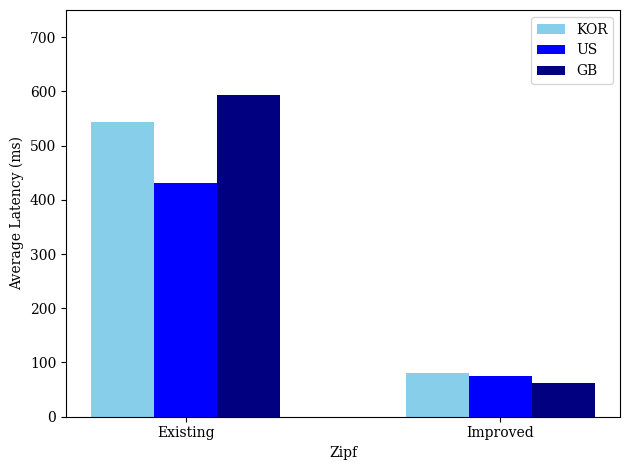

In [ ]:
import matplotlib.pyplot as plt

# 데이터 (케이스 1-1 및 케이스 1-2에 대한 응답 시간을 밀리초로 변환)
response_times_KOR_ms = [time * 1000 for time in [0.5433998147510282, 0.07985009468384903]]
response_times_US_ms = [time * 1000 for time in [0.43096834770887205, 0.07515683922454389]]
response_times_GB_ms = [time * 1000 for time in [0.5933691999337969 , 0.06246133842607484]]

# 그래프 설정
bar_width = 0.2
index = range(2)  # 케이스가 2개이므로 범위는 2로 설정

# 막대 그래프 그리기
plt.bar(index, response_times_KOR_ms, bar_width, label='KOR', color='skyblue')
plt.bar([i + bar_width for i in index], response_times_US_ms, bar_width, label='US', color='blue')
plt.bar([i + 2 * bar_width for i in index], response_times_GB_ms, bar_width, label='GB', color='navy')

# y축 범위 설정
plt.ylim(0, 750)

# 레이블, 타이틀 등 추가
plt.xlabel('Zipf')
plt.ylabel('Average Latency (ms)')
plt.xticks([i + bar_width for i in index], ['Existing', 'Improved'])  # 케이스 레이블 설정
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


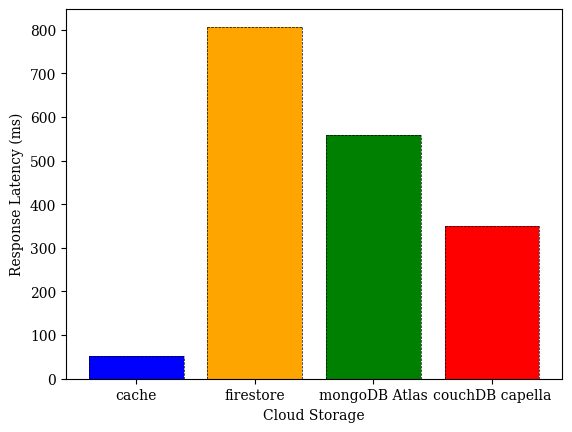

In [ ]:
import matplotlib.pyplot as plt

# 주어진 데이터
data = {
    "cache": 53,
    "firestore": 807,
    "mongoDB Atlas": 558,
    "couchDB capella": 350
}

# 데이터 파싱
categories = list(data.keys())
response_times = list(data.values())

# 막대 그래프 생성
bars = plt.bar(categories, response_times, color=['blue', 'orange', 'green', 'red'])

# 막대 선 추가
for bar in bars:
    height = bar.get_height()
    plt.plot([bar.get_x(), bar.get_x() + bar.get_width()], [height, height],linestyle='--', color='black',linewidth=0.5)  # 막대 상단에 선 추가
    plt.plot([bar.get_x(), bar.get_x()], [0, height], color='black', linestyle='--', linewidth=0.5)  # 막대 왼쪽 선 추가
    plt.plot([bar.get_x() + bar.get_width(), bar.get_x() + bar.get_width()], [0, height], color='black', linestyle='--', linewidth=0.5)  # 막대 오른쪽 선 추가

# 그래프 제목 및 레이블 설정
plt.xlabel('Cloud Storage')
plt.ylabel('Response Latency (ms)')

# 그래프 표시
plt.show()


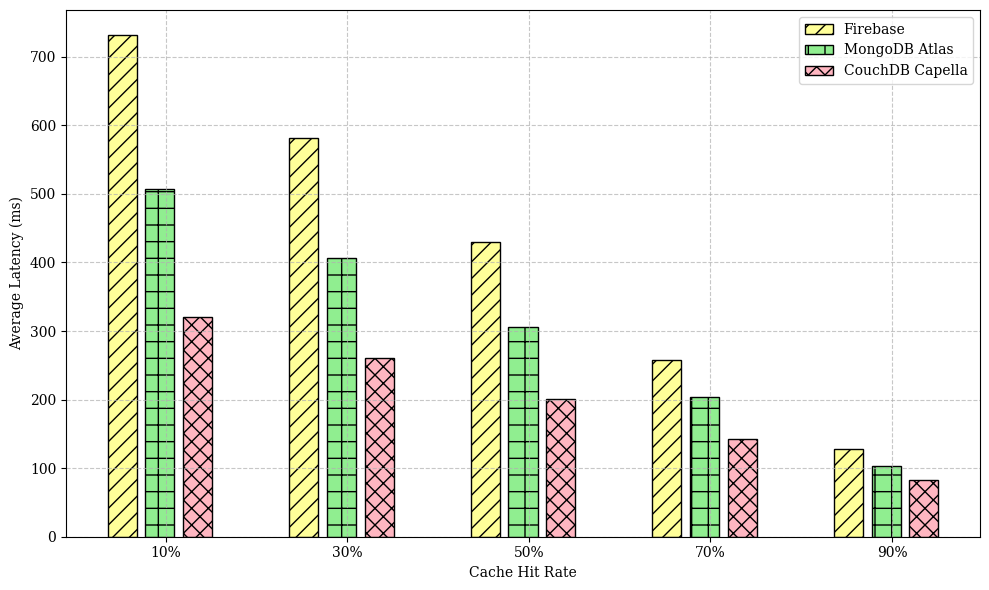

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
# Firebase 데이터
firebase_hit_rate = [10, 30, 50, 70, 90]
firebase_latency = [731.6, 580.8, 430, 258, 128.4]

# MongoDB Atlas 데이터
mongodb_hit_rate = [10, 30, 50, 70, 90]
mongodb_latency = [507.5, 406.5, 305.5, 204.5, 103.5]

# CouchDB Capella 데이터
couchdb_hit_rate = [10, 30, 50, 70, 90]
couchdb_latency = [320.3, 260.9, 201.5, 142.1, 82.7]

plt.figure(figsize=(10, 6))

bar_width = 0.16
index = [i for i in range(len(firebase_hit_rate))]

# Firebase
bars1 = plt.bar(index, firebase_latency, bar_width, label='Firebase', color='#FFFF99', edgecolor='black', hatch='//')

# MongoDB Atlas
bars2 = plt.bar([i + bar_width * 1.3 for i in index], mongodb_latency, bar_width, label='MongoDB Atlas', color='#90EE90', edgecolor='black', hatch='+')

# CouchDB Capella
bars3 = plt.bar([i + bar_width * 2.6 for i in index], couchdb_latency, bar_width, label='CouchDB Capella', color='lightpink', edgecolor='black', hatch='xx')

plt.xlabel('Cache Hit Rate')
plt.ylabel('Average Latency (ms)')
plt.xticks([i + bar_width * 1.5 for i in index], [str(rate) + '%' for rate in firebase_hit_rate])
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()